# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [106]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.

#Note: I had to fetch the data and put it manually into ~/datasets/mnist because the original website wasn't working
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

/Users/venky/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/venky/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

/Users/venky/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


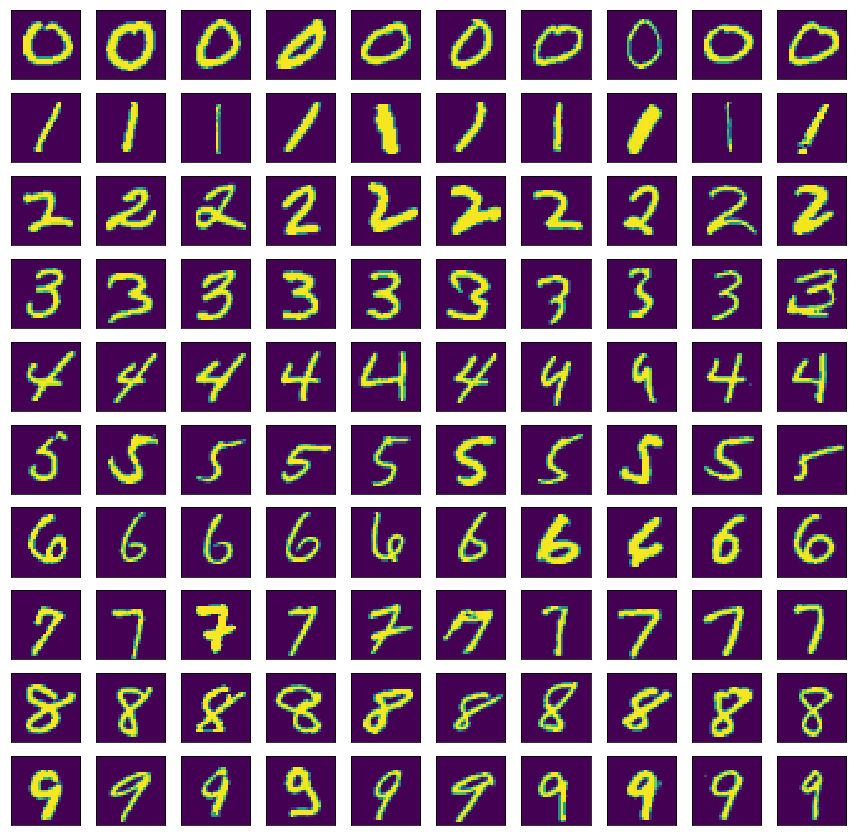

In [3]:
def P1(num_examples=10):
    
    X = mini_train_data
    Y = mini_train_labels
    
    num_digits = 10
    
    plt.figure(figsize=(15,15))
    
    for i in range(num_digits) :
        
        row_cnt = 0
        j = 0
        
        while (j < num_examples) :
            
            ax = plt.subplot(num_digits, num_examples, i*num_digits + j + 1)
            plt.setp(ax, xticks=(), yticks=())
            
            #print the ones that have the right digit
            if (Y[row_cnt] == i) :
                X_print = X[row_cnt,]
                plt.imshow(X_print.reshape(28,28))
                j += 1
                row_cnt += 1
            else :
                row_cnt += 1
                continue 
        
P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [6]:
def P2(k_values):

    for k in k_values :
        #calling KNN
        model1 = KNeighborsClassifier(n_neighbors = k)
        model1.fit(mini_train_data, mini_train_labels)
        pred_labels = model1.predict(dev_data)
        
        #Print classification report only for K=1
        if (k == 1) : 
            print ("Printing classification report for n_neighbors =", k)
            print(classification_report(dev_labels, pred_labels))
            
        accuracy = model1.score(dev_data, dev_labels)
        print ("For K = ", k, "Accuracy is ", accuracy)
        
k_values = [1, 3, 5, 7, 9]
P2(k_values)

Printing classification report for n_neighbors = 1
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94        99
         1.0       0.89      1.00      0.94       105
         2.0       0.99      0.79      0.88       102
         3.0       0.77      0.87      0.82        86
         4.0       0.89      0.82      0.85       104
         5.0       0.93      0.84      0.88        91
         6.0       0.94      0.96      0.95        98
         7.0       0.89      0.92      0.90       113
         8.0       0.94      0.88      0.91        96
         9.0       0.78      0.82      0.80       106

   micro avg       0.89      0.89      0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

For K =  1 Accuracy is  0.888
For K =  3 Accuracy is  0.878
For K =  5 Accuracy is  0.869
For K =  7 Accuracy is  0.865
For K =  9 Accuracy is  0.863


ANSWER: The most difficult digit is 3 since the precision seems to be the lowest as per the classification report for k = 1

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [28]:
def P3(train_sizes, accuracies):
    
    
    for train_set_size in train_sizes :
        
        #using K = 1
        model1 = KNeighborsClassifier(n_neighbors = 1)
        model1.fit(train_data[:train_set_size], train_labels[:train_set_size])
        
        #get prediction time using different train sizes
        time1 = time.time()
        pred_labels = model1.predict(dev_data)
        time2 = time.time()
        pred_time = time2 - time1
        
        #wrong_prediction = (pred_labels != dev_labels)
        #model1_accuracy = 100*(1-np.sum(wrong_prediction)/len(dev_labels))
        model1_accuracy = model1.score(dev_data, dev_labels)
        
        print ("Train_set_size: ", train_set_size, 
               "Model Accuracy:", model1_accuracy, 
               #"# Wrong Prediction:", np.sum(wrong_prediction), 
               "Processing time: {0:.2f}s".format(pred_time))
        accuracies.append(model1_accuracy)
        

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#train_sizes = [100, 200, 400]
accuracies = []
P3(train_sizes, accuracies)

Train_set_size:  100 Model Accuracy: 0.72 Processing time: 0.12s
Train_set_size:  200 Model Accuracy: 0.786 Processing time: 0.20s
Train_set_size:  400 Model Accuracy: 0.841 Processing time: 0.44s
Train_set_size:  800 Model Accuracy: 0.884 Processing time: 0.86s
Train_set_size:  1600 Model Accuracy: 0.902 Processing time: 1.77s
Train_set_size:  3200 Model Accuracy: 0.926 Processing time: 3.40s
Train_set_size:  6400 Model Accuracy: 0.937 Processing time: 6.87s
Train_set_size:  12800 Model Accuracy: 0.959 Processing time: 14.44s
Train_set_size:  25000 Model Accuracy: 0.97 Processing time: 27.25s


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Estimated function: y = 0.84 + 0.00x
[[60000]]
[1.24307226]


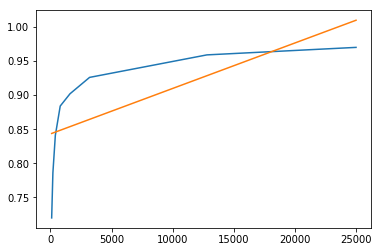

Estimated function: y = 0.57 + 0.04x
[[60000]]
[1.03386514]


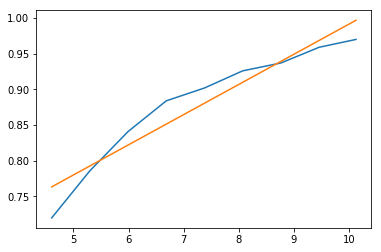

In [29]:
def P4(log_function = 1):
    
    #Using two functions here: linear-linear and log-linear
    Y = accuracies
    if (log_function == 1) :
        X = np.log(train_sizes)
    else : 
        X = train_sizes
        
    #First plot the actual data
    plt.plot (X,Y)
    
    #Now perform linear regression
    lr1 = LinearRegression(fit_intercept=True)
    lr1.fit(np.transpose([X]), Y)
    print ('Estimated function: y = %.2f + %.2fx' %(lr1.intercept_, lr1.coef_[0]))
    
    y_fit = lr1.intercept_ + lr1.coef_*X

    #And plot it
    plt.plot(X,y_fit)
    
    #test_training_array = np.array([[60000], [70000]])
    test_training_array = np.array([[60000]])
    print (test_training_array)
    
    if (log_function == 1):
        print (lr1.predict(np.log(test_training_array)))
    else:
        print (lr1.predict(test_training_array))
    
    plt.show()
    
P4(log_function = 0)
P4(log_function = 1)

ANSWER: Using a log transform of the training_set_size helps getting to a much better prediction

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
Max index is: 49
Max value is: 14
Actual digit is: 4
Mispredicted as: 9


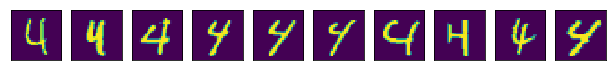

In [32]:
def P5():
    #Fitting a 1NN with all training data
    model2 = KNeighborsClassifier(n_neighbors = 1)
    model2.fit (mini_train_data, mini_train_labels)
    pred_labels = model2.predict(dev_data)
    conf_mat = confusion_matrix(dev_labels, pred_labels)
    
    print (conf_mat)

    #Find the row,col which has the biggest confusion value
    #For this zero out the diagonals which represent correct predictions
    #and only look at the non-diagonal values
    
    max_index = np.argmax(conf_mat * (np.ones((10,10)) - np.identity(10)))
    max_value = np.max(conf_mat * (np.ones((10,10)) - np.identity(10)))
    
    print ("Max index is:", max_index)
    print ("Max value is:", int(max_value))
    
    #Using max_index, we can find out the element we are looking for
    actual_digit, predicted_digit = int(np.floor(max_index/10)), max_index % 10
    
    print ("Actual digit is:", actual_digit)
    print ("Mispredicted as:", predicted_digit)
    
    #we can see that 4 is mispredicted as 9
    #Let's see a few of these
    #mispredicted_labels = (dev_labels == 4) & (pred_labels == 9)
    mispredicted_labels = (dev_labels == actual_digit) & (pred_labels == predicted_digit)
    
    #Let's plot 10 of the digits that are mispredicted
    plt.figure(figsize=(15,10))
    
    fig_cnt = 1
    for i in range(len(dev_labels)):
        if (fig_cnt == 11):
            break
        elif (mispredicted_labels[i] == 1) :
            ax = plt.subplot(1, np.sum(mispredicted_labels), fig_cnt)
            plt.setp(ax, xticks=(), yticks=())
            X_print = dev_data[i,]
            plt.imshow(X_print.reshape(28,28))
            fig_cnt += 1

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [40]:
def P6(X):
    #X = mini_train_data
    #Y = mini_train_labels
    
    #print (np.shape(X))
    
    #reshape to 28x28 grid
    X_r = X.reshape((np.shape(X)[0],28,28))
    
    
    #The algorithm I used was to move the 28x28 grid in 8 directions
    #up, down, left, right and then diagonally right, left, up, down
    #and then average all the 9 matrices
    
    #Now let's move the 28x28 in 8 directions for each row
    #Dn by 1
    X_r_dn = np.roll(X_r, 1, axis = 1)
    #Up by 1
    X_r_up = np.roll(X_r, -1, axis = 1)
    #Rt by 1
    X_r_rt = np.roll(X_r, 1, axis = 2)
    #Lt by 1
    X_r_lt = np.roll(X_r, -1, axis = 2)
    
    #Diagonals
    #Diag Dn Right = right by 1, down by 1
    X_r_rt_dn = np.roll(X_r_rt, 1, axis = 1)
    #Diag Up Right = right by 1, up by 1
    X_r_rt_up = np.roll(X_r_rt, -1, axis = 1)
    #Diag Dn Left = left by 1, down by 1
    X_r_lt_dn = np.roll(X_r_lt, 1, axis = 2)
    #Diag Up Left = left by 1, up by 1
    X_r_lt_up = np.roll(X_r_lt, -1, axis = 2)
    
    #Now that we have all of the arrays, we take an average and get the blurred images
    X_blur = 1/9* (X_r + X_r_dn + X_r_up + X_r_rt + X_r_lt + 
                   X_r_rt_dn + X_r_rt_up + X_r_lt_dn + X_r_lt_up)
    
    return X_blur.reshape(np.shape(X)[0], 784)
    

#Blur mini_train_data and dev_data
mini_train_data_blur = P6(mini_train_data)
dev_data_blur = P6(dev_data)


#Baseline
model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit (mini_train_data, mini_train_labels)
print ('Accuracy of baseline model with no blurring:', model1.score(dev_data, dev_labels))

#With blurring of training data only
model2 = KNeighborsClassifier(n_neighbors = 1)
model2.fit (mini_train_data_blur, mini_train_labels)
print ('Accuracy of prediction when Training data alone is blurred:', model2.score(dev_data, dev_labels))

#Blur dev only
print ('Accuracy of prediction when Dev Data alone is blurred', model1.score (dev_data_blur, dev_labels))

#Blurring both dev and train
print ('Accuracy of prediction when Training & Dev Data are blurred:', model2.score(dev_data_blur, dev_labels))



Accuracy of baseline model with no blurring: 0.888
Accuracy of prediction when Training data alone is blurred: 0.907
Accuracy of prediction when Dev Data alone is blurred 0.875
Accuracy of prediction when Training & Dev Data are blurred: 0.9


ANSWER: The best result is with training data blurring alone with no blurring of dev data. Perhaps the model is forced to work extra hard with blurred training data and this helps the prediction process

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [44]:
def conv_to_2lvls (X):
    
    #create 1's matrix
    ones = np.ones(np.shape(X))

    #Now find the ones, twos and threes and add them up
    X_thr0 = X < 0.5*ones
    X_thr1 = (X >= 0.5*ones)

    Y = 0 * X_thr0 + 1 * X_thr1 
    #print (X)
    #print (Y)
    return Y

def conv_to_3lvls (X):
    
    #create 1's matrix
    ones = np.ones(np.shape(X))

    #Now find the ones, twos and threes and add them up
    X_thr1 = X < 0.33*ones
    X_thr2 = (X >= 0.33*ones) & (X < 0.66*ones)
    X_thr3 = X >= 0.66*ones
    
    Y = 0 * X_thr1 + 1 * X_thr2 + 2 * X_thr3
    
    return Y


def P7(algorithm = "BernoulliNB"):
    
    #2 levels
    if (algorithm == "BernoulliNB"):
        
        #use binarize
        model_nb = BernoulliNB(binarize = 0.5);
        model_nb.fit(mini_train_data, mini_train_labels)
    
        model_nb_accuracy = model_nb.score(dev_data, dev_labels)
        print('Accuracy of prediction BernoulliNB:', model_nb_accuracy)
    
    #3 levels
    elif (algorithm == "MultinomialNB"):
        
        #create 3 levels for each pixel
        #Note that I used a uniform distribution here with 3 regions
        #The regions are 0 to 0.33, 0.33 to 0.66, and 0.66 to 1
        mini_train_data_3levels = conv_to_3lvls(mini_train_data)
        dev_data_3levels = conv_to_3lvls(dev_data)
        
        model_nb = MultinomialNB();
        model_nb.fit(mini_train_data_3levels, mini_train_labels)
        
        model_nb_accuracy = model_nb.score(dev_data, dev_labels)
        print('Accuracy of prediction MultinomialNB:', model_nb_accuracy)
        

P7("BernoulliNB")
P7("MultinomialNB")

Accuracy of prediction BernoulliNB: 0.815
Accuracy of prediction MultinomialNB: 0.798


ANSWER: MultinomialNB was worse. I think this is because the pixels are not uniformly distributed in value

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [67]:
def P8(alphas):
    model_nb = BernoulliNB(binarize = 0.5)
    clf = GridSearchCV(model_nb, alphas, cv = 5)
    clf.fit(mini_train_data, mini_train_labels)
    #print(clf)
    return clf

    #model_nb_alpha0 = nb(alpha = '0')
    #print ("Accuracy over dev data for alpha = 0", model_nb_alpha0(dev_data, dev_labels))

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

#This provides the accuracy for the various alphas
print (nb.cv_results_['mean_test_score'])

/Users/venky/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/venky/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/venky/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/venky/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/venky/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _A

[0.81  0.82  0.819 0.819 0.814 0.806 0.802 0.8   0.74 ]


/Users/venky/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
print(nb.best_params_)

{'alpha': 0.0001}


ANSWER: The best value of alpha is 0.0001. Accuracy when alpha = 0 is 0.81. For very small values of alpha, the precision would be better, but the simulation would take longer. 0.81 is close to the optimum value as I expected.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [91]:
def P9(clf = 0):
    
    
    #This classifier only uses smoothing
    if (clf == 1) :
        print ("\nUsing smoothing only:")
        model_gnb = GaussianNB(var_smoothing = 0.11)
        model_gnb.fit(mini_train_data, mini_train_labels)
        pred_labels = model_gnb.predict(dev_data)

    #This is a classifier using var_smoothing and preprocessing
    elif (clf == 2): 
        print ("\nUsing Normalization for preprocessing:")
        model_gnb = GaussianNB(var_smoothing=0.11)
        from sklearn import preprocessing
        model_gnb.fit(preprocessing.scale(mini_train_data, axis = 1), mini_train_labels)
        pred_labels = model_gnb.predict(preprocessing.scale(dev_data, axis = 1))
        
    else:
        print ("\nNo preprocessing or smoothing:")
        model_gnb = GaussianNB()
        model_gnb.fit(mini_train_data, mini_train_labels)
        pred_labels = model_gnb.predict(dev_data)
        
        
    wrong_predictions = (pred_labels != dev_labels)
    model_gnb_accuracy = 100*(1 - np.sum(wrong_predictions)/len(dev_labels))
        
    print('\nNumber of incorrect predictions for GaussianNB:', np.sum(wrong_predictions))
    print('\nAccuracy of prediction GaussianNB:', model_gnb_accuracy)
    
    print('\nTheta of model', model_gnb.theta_)
    print('\nSigma of model', model_gnb.sigma_)
    
    

gnb = P9(clf = 0)
gnb = P9(clf = 1)
gbb = P9(clf = 2)


No preprocessing or smoothing:

Number of incorrect predictions for GaussianNB: 379

Accuracy of prediction GaussianNB: 62.1

Theta of model [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sigma of model [[1.98697608e-10 1.98697608e-10 1.98697608e-10 ... 1.98697608e-10
  1.98697608e-10 1.98697608e-10]
 [1.98697608e-10 1.98697608e-10 1.98697608e-10 ... 1.98697608e-10
  1.98697608e-10 1.98697608e-10]
 [1.98697608e-10 1.98697608e-10 1.98697608e-10 ... 1.98697608e-10
  1.98697608e-10 1.98697608e-10]
 ...
 [1.98697608e-10 1.98697608e-10 1.98697608e-10 ... 1.98697608e-10
  1.98697608e-10 1.98697608e-10]
 [1.98697608e-10 1.98697608e-10 1.98697608e-10 ... 1.98697608e-10
  1.98697608e-10 1.98697608e-10]
 [1.98697608e-10 1.98697608e-10 1.98697608e-10 ... 1.98697608e-10
  1.98697608e-10 1.98697608e-10]]

Using smoothing only:

Number of incorrect predictions for GaussianNB: 212

Accuracy 

ANSWER: Smoothing and normalizing the sigma and theta helped bring the accuracy close to what we achieved earlier

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

(10, 784)


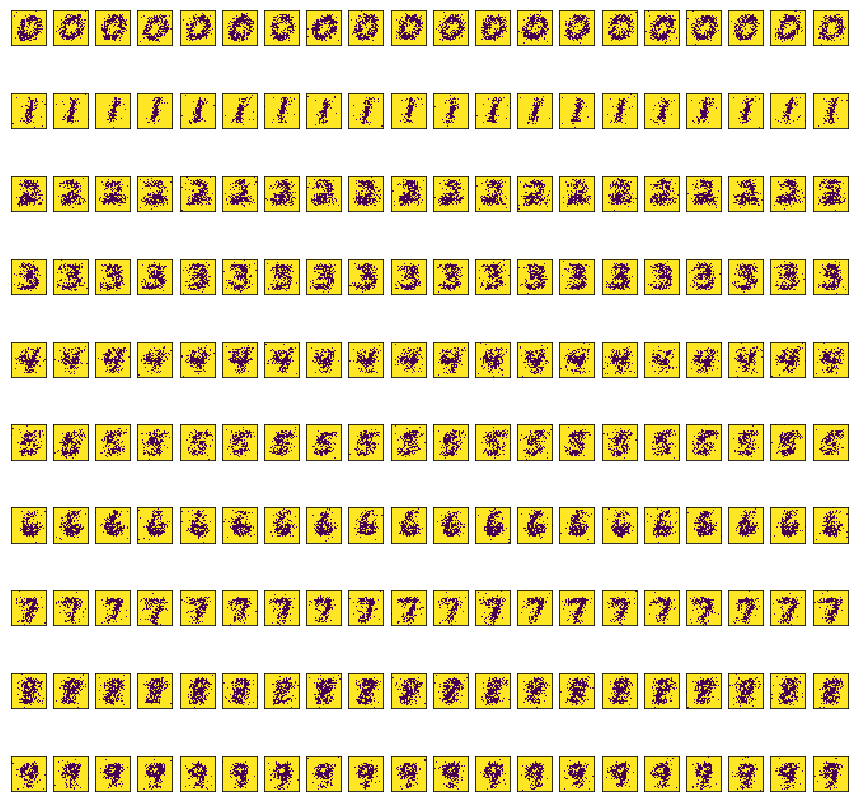

In [92]:
def P10(num_examples):
    num_digits = 10
    model_gen = BernoulliNB()
    model_gen.fit(mini_train_data, mini_train_labels)
    
    #Probability of pixel for each feature
    feature_probability = np.exp(model_gen.feature_log_prob_)
    print(np.shape(feature_probability))
    
    plt.figure(figsize=(15,15))
    
    #Now generate num_examples of each digit by turning pixels on and off
    
    #generate 20 examples per number
    for digit in range(num_digits) :
        for example in range(num_examples):
            pixel_grid = np.random.rand(1,784)
            #print ("shape of pixel_grid", np.shape(pixel_grid))
            #check to see whether the value of the pixel is greater than or less than feature_probability
            pixel_on_off = pixel_grid > feature_probability[digit,:]
            #print ("shape of pixel_on_off", np.shape(pixel_on_off))
            
            #plot
            #ax = plt.subplot(num_digits, num_examples, digit*num_digits + example + 1)
            ax = plt.subplot(num_digits, num_examples, digit*num_examples + example + 1)
            plt.setp(ax, xticks=(), yticks=())
            plt.imshow(pixel_on_off.reshape(28,28))
            
    

P10(20)

ANSWER: The generated digits look a lot worse than the actual ones. They are more "grainy" than the original.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [105]:
def P11(buckets, correct, total):
    
    #Chose alpha = 0.0001
    model_bnb = BernoulliNB(alpha = 0.0001, binarize = 0.5)
    model_bnb.fit(mini_train_data, mini_train_labels)
    
    #prediction on dev data
    pred_labels = model_bnb.predict(dev_data)
    
    #look at probability values
    posterior_prob = model_bnb.predict_proba(dev_data)
    
    #value of max prob for each sample
    pred_label_max_prob = np.max(posterior_prob, axis = 1)
    
    #check which ones were correct
    correct_labels = (pred_labels == dev_labels)

    #This part is to figure out which bin the value falls into
    #Not using this one since I found an easier way with np.digitize
    
    ######################################################################################################
    ##initialize
    #is_in_bucket = np.zeros((np.shape(pred_labels)[0], len(buckets)))
    ##print (np.shape(is_in_bucket))
    
    ##now figure out whether the probabilties are greater than the value in each bucket
    #for i in range(len(buckets)):
    #    is_in_bucket[:,i] = pred_label_max_prob <= buckets[i]
        
    ##initialize
    ##max_prob_bucket = np.zeros((np.shape(pred_labels)[0]))
    
    ##Now add all the 1's and figure out which bucket the probability belongs to
    #max_prob_bucket = np.ones((np.shape(pred_labels)[0])) * len(buckets) - np.sum(is_in_bucket, axis = 1)
    ######################################################################################################
    
    #Found easier way using np.digitize
    max_prob_bucket = np.digitize(pred_label_max_prob, buckets, right = True)
    
    #print (np.shape(is_in_bucket))
    #print (pred_label_max_prob[0:20])
    #print (is_in_bucket[0:20,:])
    #print (max_prob_bucket[0:20])

    correct = [0 for i in buckets]
    total = [0 for i in buckets]
    
    #Here find out which bucket the max_prob falls into
    for i in range(len(buckets)):
        #print ("Checking all labels for bucket:", buckets[i])
        for j in range(np.shape(pred_labels)[0]) :
            if (max_prob_bucket[j] == i):
                total[i] = total[i] + 1
                #If correct, then increment correct[i] for this bucket
                correct[i] = correct[i] + correct_labels[j]
    
    
    #print (total)
    #print (correct)
    
    return(correct, total)
    
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

(correct, total) = P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  34    accuracy = 0.324
p(pred) <= 0.9990000000000    total =  79    accuracy = 0.456
p(pred) <= 0.9999900000000    total =  74    accuracy = 0.541
p(pred) <= 0.9999999000000    total =  68    accuracy = 0.735
p(pred) <= 0.9999999990000    total =  51    accuracy = 0.784
p(pred) <= 0.9999999999900    total =  64    accuracy = 0.797
p(pred) <= 0.9999999999999    total =  64    accuracy = 0.891
p(pred) <= 1.0000000000000    total = 566    accuracy = 0.940


ANSWER: Naive Bayes seems to be a weakly calibrated classifier since the accuracy is pretty low for 90% but increases linearly as the probabilty of prediction increases

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()